#  dataset

In [1]:
import os

def process_annotation_file(input_file, output_file, image_folder):
    with open(input_file, 'r', encoding='utf-8') as f_in, open(output_file, 'a', encoding='utf-8') as f_out:
        for line in f_in:
            line = line.strip()
            if line:  # Kiểm tra xem dòng có rỗng không
                try:
                    image_name, label = line.split(maxsplit=1)
                    image_path = os.path.abspath(os.path.join(image_folder, image_name))
                    f_out.write(f"{image_path}\t{label}\n")
                except ValueError:
                    print(f"Dòng không hợp lệ: {line}")
                    continue

# In ra thư mục làm việc hiện tại
print(f"Thư mục làm việc hiện tại: {os.getcwd()}")

# Đường dẫn tuyệt đối của thư mục hiện tại
base_path = os.path.abspath('')
print(f"Đường dẫn tuyệt đối: {base_path}")

# Tạo đường dẫn đến các folder con trong folder dataset
dataset_folders = ['dataset', 'dataset2', 'newdataset', 'Thai_dataset2', 'Van_dataset','output_images']

# Đường dẫn đến thư mục chứa ảnh
image_folder = [os.path.join(base_path, 'Model', 'dataset', folder) for folder in dataset_folders]

# Kiểm tra sự tồn tại của các thư mục
for folder in image_folder:
    if os.path.exists(folder):
        print(f"Thư mục tồn tại: {folder}")
    else:
        print(f"Thư mục không tồn tại: {folder}")

# Đường dẫn đến thư mục đầu ra
output_folder = os.path.join(base_path, 'Model', 'dataset')
print(f"Thư mục đầu ra: {output_folder}")

# Tạo thư mục đầu ra nếu nó chưa tồn tại
os.makedirs(output_folder, exist_ok=True)

# Đường dẫn đầy đủ cho các file đầu vào
train_input = [os.path.join(folder, 'train.txt') for folder in image_folder]
test_input = [os.path.join(folder, 'test.txt') for folder in image_folder]

print(train_input, test_input)

# Kiểm tra sự tồn tại của các file đầu vào
for file in train_input + test_input:
    if os.path.exists(file):
        print(f"File tồn tại: {file}")
    else:
        print(f"File không tồn tại: {file}")

# Đường dẫn đầy đủ cho các file đầu ra
train_output = os.path.join(output_folder, "train_line_annotation.txt")
test_output = os.path.join(output_folder, "test_line_annotation.txt")

def remove_file_if_exists(file_path):
    if os.path.exists(file_path):
        os.remove(file_path)
        print(f"Đã xóa file cũ: {file_path}")
remove_file_if_exists(train_output)
remove_file_if_exists(test_output)

# Xử lý file train.txt
for i in range(len(dataset_folders)):
    process_annotation_file(train_input[i], train_output, image_folder[i])

# Xử lý file test.txt
for i in range(len(dataset_folders)):
    process_annotation_file(test_input[i], test_output, image_folder[i])

print(f"Đã tạo thành công các file trong thư mục: {output_folder}")

Thư mục làm việc hiện tại: d:\PJ\AI_OCR
Đường dẫn tuyệt đối: d:\PJ\AI_OCR
Thư mục tồn tại: d:\PJ\AI_OCR\Model\dataset\dataset
Thư mục tồn tại: d:\PJ\AI_OCR\Model\dataset\dataset2
Thư mục tồn tại: d:\PJ\AI_OCR\Model\dataset\newdataset
Thư mục tồn tại: d:\PJ\AI_OCR\Model\dataset\Thai_dataset2
Thư mục tồn tại: d:\PJ\AI_OCR\Model\dataset\Van_dataset
Thư mục tồn tại: d:\PJ\AI_OCR\Model\dataset\output_images
Thư mục đầu ra: d:\PJ\AI_OCR\Model\dataset
['d:\\PJ\\AI_OCR\\Model\\dataset\\dataset\\train.txt', 'd:\\PJ\\AI_OCR\\Model\\dataset\\dataset2\\train.txt', 'd:\\PJ\\AI_OCR\\Model\\dataset\\newdataset\\train.txt', 'd:\\PJ\\AI_OCR\\Model\\dataset\\Thai_dataset2\\train.txt', 'd:\\PJ\\AI_OCR\\Model\\dataset\\Van_dataset\\train.txt', 'd:\\PJ\\AI_OCR\\Model\\dataset\\output_images\\train.txt'] ['d:\\PJ\\AI_OCR\\Model\\dataset\\dataset\\test.txt', 'd:\\PJ\\AI_OCR\\Model\\dataset\\dataset2\\test.txt', 'd:\\PJ\\AI_OCR\\Model\\dataset\\newdataset\\test.txt', 'd:\\PJ\\AI_OCR\\Model\\dataset\\Thai_data

# Train model



1.   Load your config
2.   Train model using your dataset above



Load the default config, we adopt VGG for image feature extraction

In [2]:
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

# Change the config 

* *data_root*: the folder save your all images
* *train_annotation*: path to train annotation
* *valid_annotation*: path to valid annotation
* *print_every*: show train loss at every n steps
* *valid_every*: show validation loss at every n steps
* *iters*: number of iteration to train your model
* *export*: export weights to folder that you can use for inference
* *metrics*: number of sample in validation annotation you use for computing full_sequence_accuracy, for large dataset it will take too long, then you can reuduce this number


In [3]:
current_directory = os.getcwd()
absolute_path = os.path.join(current_directory, 'Model\data', 'my_model.pth')
# config = Cfg.load_config_from_file(os.path.join(current_directory,'Model\data','config.yml'))
config = Cfg.load_config_from_name('vgg_transformer')
# config['weights'] = absolute_path
# config['pretrain'] = absolute_path

In [4]:

dataset_params = {
    'name':'hw',
    'data_root':output_folder,
    'train_annotation':'train_line_annotation.txt',
    'valid_annotation':'test_line_annotation.txt'
}

params = {
    'batch_size': 8,
    'print_every': 50,
    'valid_every': 50*10,
    'iters': 2000,
    'export': './Model/data/my_model.pth',
    'metrics': 200,
    'early_stopping': {
        'patience': 20,
        'min_delta': 0.001
    },
    'lr_scheduler': {
        'factor': 0.1,
        'patience': 5,
        'verbose': True
    }
}

config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = 'cuda:0'
config['dataloader']['num_workers']=0
# config['batch_size'] = 1  # Hoặc một giá trị nhỏ hơn

you can change any of these params in this full list below

In [5]:
config

{'vocab': 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ ',
 'device': 'cuda:0',
 'seq_modeling': 'transformer',
 'transformer': {'d_model': 256,
  'nhead': 8,
  'num_encoder_layers': 6,
  'num_decoder_layers': 6,
  'dim_feedforward': 2048,
  'max_seq_length': 1024,
  'pos_dropout': 0.1,
  'trans_dropout': 0.1},
 'optimizer': {'max_lr': 0.0003, 'pct_start': 0.1},
 'trainer': {'batch_size': 8,
  'print_every': 50,
  'valid_every': 500,
  'iters': 2000,
  'export': './Model/data/my_model.pth',
  'checkpoint': './checkpoint/transformerocr_checkpoint.pth',
  'log': './train.log',
  'metrics': 200,
  'early_stopping': {'patience': 20, 'min_delta': 0.001},
  'lr_scheduler': {'factor': 0.1, 'patience': 5, 'verbose': True}},
 'dataset': {'name': 'hw',
  'data_root': 'd:\\PJ\\AI_OCR\\Model\\dataset',
  'train_ann

You should train model from our pretrained 

In [6]:
import torch

if torch.cuda.is_available():
    for i in range(torch.cuda.device_count()):
        print(f"GPU {i}: {torch.cuda.get_device_name(i)}")
else:
    print("CUDA is not available.")


GPU 0: NVIDIA GeForce RTX 4050 Laptop GPU


In [7]:
trainer = Trainer(config, pretrained=True)


C:\Users\M S I\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Model weight C:\Users\MSI~1\AppData\Local\Temp\vgg_transformer.pth exsits. Ignore download!


C:\Users\M S I\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\vietocr\model\trainer.py:278: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issue

train_hw exists. Remove folder if you want to create new dataset


train_hw build cluster: 100%|█████████████████████████████████| 569/569 [00:00<00:00, 141341.96it/s]

valid_hw exists. Remove folder if you want to create new dataset



valid_hw build cluster: 100%|██████████████████████████████████| 211/211 [00:00<00:00, 69987.99it/s]


Save model configuration for inference, load_config_from_file

In [8]:
print(len(trainer.train_gen.dataset))

569


In [9]:
trainer.config.save(os.path.join(current_directory, 'Model\data','config.yml'))

Visualize your dataset to check data augmentation is appropriate

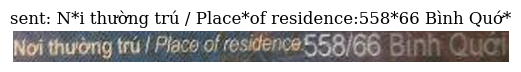

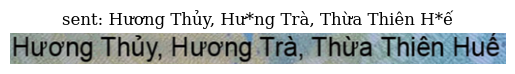

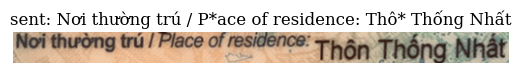

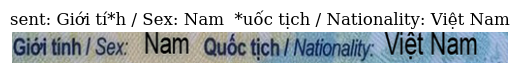

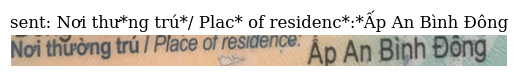

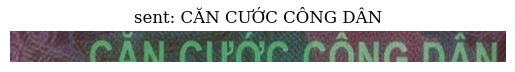

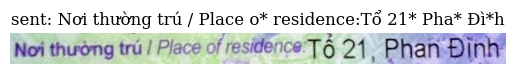

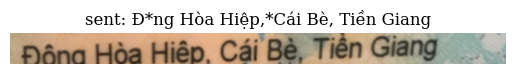

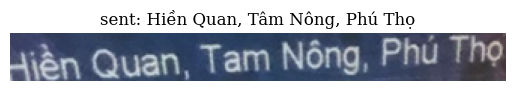

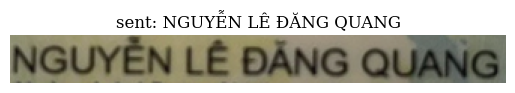

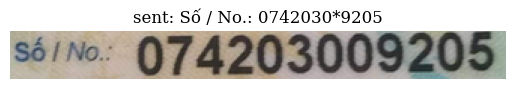

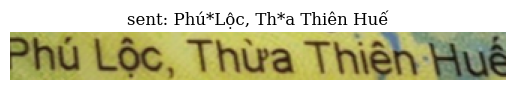

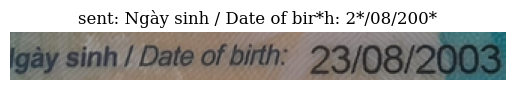

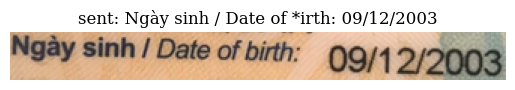

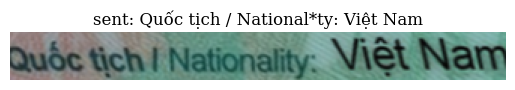

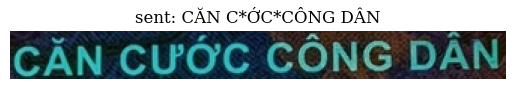

In [10]:
trainer.visualize_dataset()

Train now

In [11]:
print(f"Batch size: {config['trainer']['batch_size']}")


Batch size: 8


In [12]:
trainer.train()

C:\Users\M S I\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\nn\functional.py:5560: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = scaled_dot_product_attention(q, k, v, attn_mask, dropout_p, is_causal)


iter: 000050 - train loss: 0.980 - lr: 5.46e-05 - load time: 1.84 - gpu time: 17.57
iter: 000100 - train loss: 0.714 - lr: 1.57e-04 - load time: 1.36 - gpu time: 13.14
iter: 000150 - train loss: 0.685 - lr: 2.59e-04 - load time: 1.08 - gpu time: 11.90
iter: 000200 - train loss: 0.709 - lr: 3.00e-04 - load time: 1.06 - gpu time: 11.74
iter: 000250 - train loss: 0.696 - lr: 2.99e-04 - load time: 1.04 - gpu time: 11.22
iter: 000300 - train loss: 0.677 - lr: 2.98e-04 - load time: 1.01 - gpu time: 10.85
iter: 000350 - train loss: 0.678 - lr: 2.95e-04 - load time: 1.42 - gpu time: 13.57
iter: 000400 - train loss: 0.691 - lr: 2.91e-04 - load time: 1.51 - gpu time: 15.00
iter: 000450 - train loss: 0.675 - lr: 2.86e-04 - load time: 1.18 - gpu time: 12.97
iter: 000500 - train loss: 0.687 - lr: 2.80e-04 - load time: 1.28 - gpu time: 14.75
iter: 000500 - valid loss: 0.656 - acc full seq: 0.7917 - acc per char: 0.9156
iter: 000550 - train loss: 0.670 - lr: 2.73e-04 - load time: 1.32 - gpu time: 14.

Visualize prediction from our trained model


Compute full seq accuracy for full valid dataset